# 결정트리

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size = 0.2, random_state=11
)

In [3]:
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

### 모델 시각화

In [4]:
from sklearn.tree import export_graphviz

# export_graphvix()의 호출 결과로 out_file로 지정된 tree.dot를 형성함 
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris.target_names,
                feature_names=iris.feature_names, impurity=True, filled=True)


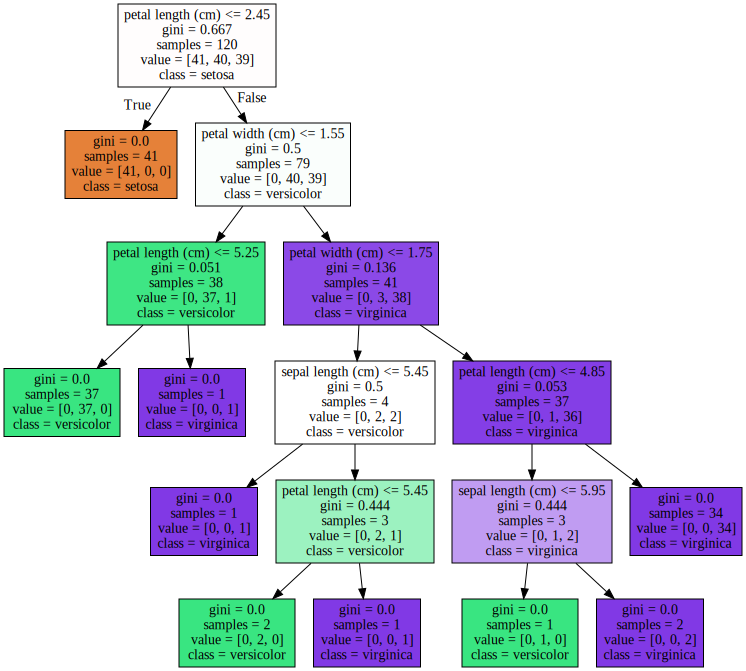

In [5]:
import graphviz 

with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [6]:
pred = dt_clf.predict(X_test)

In [7]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9333333333333333

### 제약 조건
 - max depth 가 3인 경우

In [10]:
dt_clf2 = DecisionTreeClassifier(max_depth=3, random_state=156)
dt_clf2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=156)

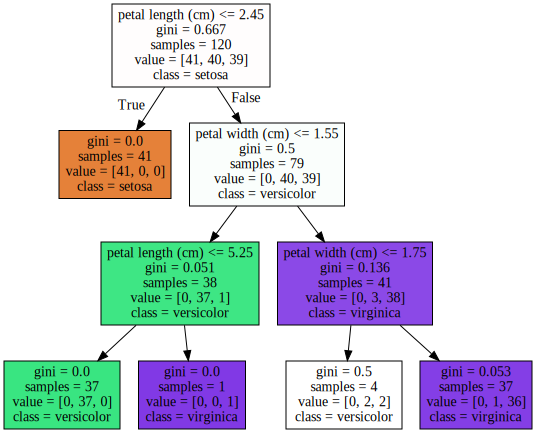

In [12]:
export_graphviz(dt_clf2, out_file="tree.dot", class_names=iris.target_names,
                feature_names=iris.feature_names, impurity=True, filled=True)
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [14]:
pred2 = dt_clf2.predict(X_test)
accuracy_score(y_test, pred2)

0.9333333333333333

 - min sample split = 4 인 경우

In [15]:
dt_clf3 = DecisionTreeClassifier(min_samples_split=4, random_state=156)
dt_clf3.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=4, random_state=156)

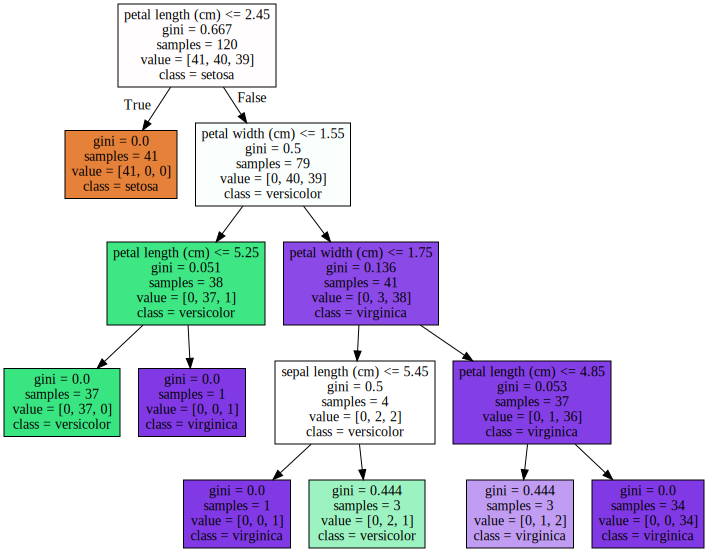

In [16]:
export_graphviz(dt_clf3, out_file="tree.dot", class_names=iris.target_names,
                feature_names=iris.feature_names, impurity=True, filled=True)
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [17]:
pred3 = dt_clf3.predict(X_test)
accuracy_score(y_test, pred3)

0.9333333333333333

 - min samples leaf 가 4인 경우

In [21]:
dt_clf4 = DecisionTreeClassifier(min_samples_leaf=4, random_state=156)
dt_clf4.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=4, random_state=156)

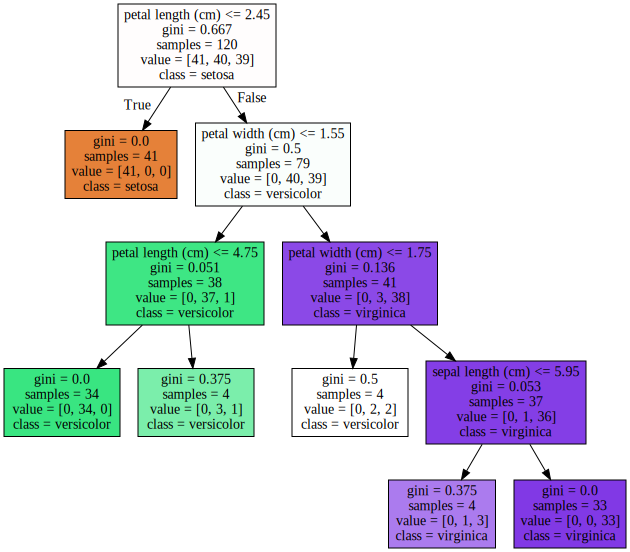

In [22]:
export_graphviz(dt_clf4, out_file="tree.dot", class_names=iris.target_names,
                feature_names=iris.feature_names, impurity=True, filled=True)
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [24]:
pred4 = dt_clf4.predict(X_test)
accuracy_score(y_test, pred4)

0.9333333333333333

### feature 중요도 

In [27]:
import seaborn as sns
%matplotlib inline

In [28]:
for name, value in zip(iris.feature_names, dt_clf.feature_importances_):
    print(f'{name} : {value:.4f}')

sepal length (cm) : 0.0250
sepal width (cm) : 0.0000
petal length (cm) : 0.5549
petal width (cm) : 0.4201


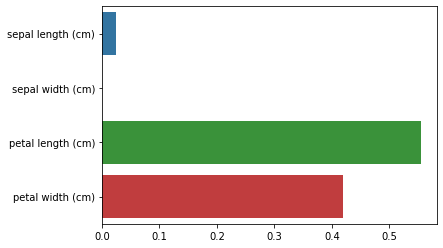

In [30]:
sns.barplot(x=dt_clf.feature_importances_, y=iris.feature_names);